Here's my assignment for week one of BrainHack school 2020. 

This assignment will be featuring two multilinear regression models based on the dataset "brainsize.csv", that includes different variables:

* Gender
* Full Scale Intelligence Quotient as FSIQ
* Verbal Intelligence Quotient as VIQ
* Performance Intellignece Quotient as PIQ
* Brain volume (voxel count) as MRI_Count
* Body weight as Weight
* Body Height as Height

Two different random_seed based variables partY and partY2 will have to be. This exercise is designed to demonstrate how easily false positives or inflated prediction rates via p-hacking can be produced.

#### Create pandas dataframe from .csv file

Import needed packages

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm

Load brainsize.csv file as reading file

In [3]:
#load brainsize.csv file as reading file
data = pd.read_csv('brainsize.csv', sep=';', index_col=0, na_values= ".")
print(data.shape)
data.head()

(40, 7)


,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545


Identify and verify type of data

In [4]:
data.dtypes

Gender        object
FSIQ           int64
VIQ            int64
PIQ            int64
Weight       float64
Height       float64
MRI_Count      int64
dtype: object

#### Assess for missing values; for this senario, removal of missing values will be adopted

In [5]:
data = data.dropna()
data.shape #verify dropna. Here 2 rows were excluded.

(38, 7)

###  Descriptive stats

In [6]:
data.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,38.000000,38.000000,38.000000,38.000000,38.000000,3.800000e+01
mean,113.552632,112.131579,111.342105,151.052632,68.421053,9.067542e+05
std,23.815391,22.939605,22.597867,23.478509,3.993790,7.256175e+04
min,77.000000,71.000000,72.000000,106.000000,62.000000,7.906190e+05
25%,90.250000,90.250000,89.250000,135.250000,66.000000,8.548115e+05
50%,116.500000,113.000000,115.000000,146.500000,68.000000,9.053990e+05
75%,135.000000,129.000000,128.000000,172.000000,70.375000,9.495405e+05
max,144.000000,150.000000,150.000000,192.000000,77.000000,1.079549e+06


### Create and add partY variable with random values

In [7]:
np.random.seed(1) # seed for the next random number.
data['partY'] = np.random.normal(loc=100, # stands for mean.
                                 scale =10, #stands for standard deviation.
                                 size = len(data)) #according to data shape (number of rows).
data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,partY
1,Female,133,132,124,118.0,64.5,816932,116.243454
3,Male,139,123,150,143.0,73.3,1038437,93.882436
4,Male,133,129,128,172.0,68.8,965353,94.718282
5,Female,137,132,134,147.0,65.0,951545,89.270314
6,Female,99,90,110,146.0,69.0,928799,108.654076


### Creation of random seed variable partY2

In [8]:
np.random.seed(20)
data['partY2'] = np.random.normal(loc=100,
                                  scale =10, 
                                  size= len(data)) #according to shape, 38 rows
data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,partY,partY2
1,Female,133,132,124,118.0,64.5,816932,116.243454,108.838931
3,Male,139,123,150,143.0,73.3,1038437,93.882436,101.958650
4,Male,133,129,128,172.0,68.8,965353,94.718282,103.575365
5,Female,137,132,134,147.0,65.0,951545,89.270314,76.567381
6,Female,99,90,110,146.0,69.0,928799,108.654076,89.151674


#### Let's now check our descriptives statistics with the addition of the two variables

In [9]:
data.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,partY,partY2
count,38.000000,38.000000,38.000000,38.000000,38.000000,3.800000e+01,38.000000,38.000000
mean,113.552632,112.131579,111.342105,151.052632,68.421053,9.067542e+05,98.424799,98.748172
std,23.815391,22.939605,22.597867,23.478509,3.993790,7.256175e+04,9.485507,11.626191
min,77.000000,71.000000,72.000000,106.000000,62.000000,7.906190e+05,76.984613,68.102972
25%,90.250000,90.250000,89.250000,135.250000,66.000000,8.548115e+05,92.561796,90.774232
50%,116.500000,113.000000,115.000000,146.500000,68.000000,9.053990e+05,97.048474,100.422918
75%,135.000000,129.000000,128.000000,172.000000,70.375000,9.495405e+05,105.233902,105.515396
max,144.000000,150.000000,150.000000,192.000000,77.000000,1.079549e+06,117.448118,120.598380


## Statistical analyses

### Multiple regression model with variable partY

FSIQ, VIQ and PIQ combined must certainly be good predictors. Let's observe the prediction potential of these factors on the variable partY

In [10]:
# Fit the model
model_partY = ols('partY ~ FSIQ + VIQ + PIQ', data).fit()

# Print the summary
print(model_partY.summary())

                            OLS Regression Results                            
Dep. Variable:                  partY   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     4.156
Date:                Sat, 30 May 2020   Prob (F-statistic):             0.0130
Time:                        13:34:04   Log-Likelihood:                -132.97
No. Observations:                  38   AIC:                             273.9
Df Residuals:                      34   BIC:                             280.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     78.0523     11.027      7.078      0.0

#### Results

* The intercept β^0=78.052
* The slopes β^1= [FISQ(-2.703, p =0.002);VIQ(1.463, p= 0.004);PIQ(1.467, p = 0.002)]
* R-squared value of 0.268; around 27 % of variation of partY is explained by the three types of intelligence quotient.

Here, all three prediction effects of the 3 factors are significant. FSIQ has a statistically significant (using p < 0.05 as a rejection rule) negative effect on partY outcomes, VIQ has a statistically significant (using p < 0.05 as a rejection rule) positive predicting effect of partY and PIQ has also a statistically significant (using p < 0.05 as a rejection rule) positive predicting effect of partY.


#### Observation of the regressors

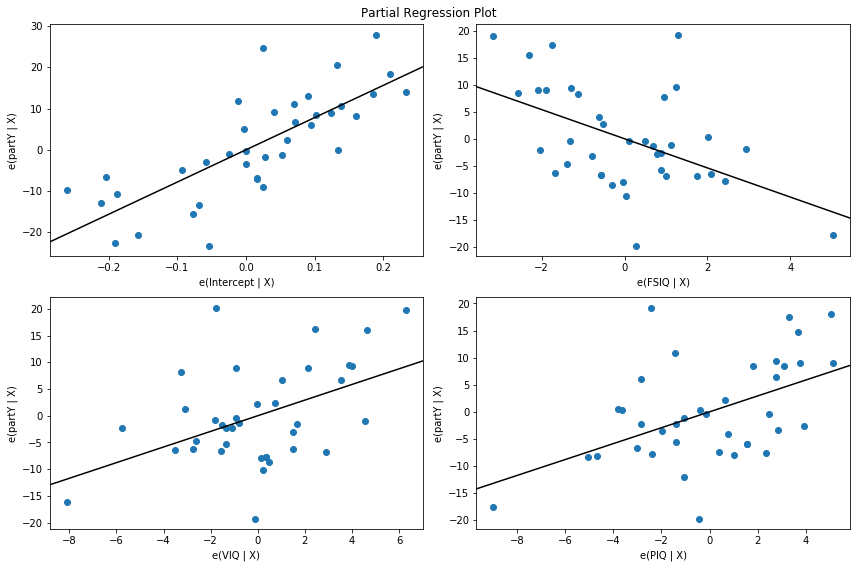

In [11]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model_partY, fig=fig)
#https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html

#### Plot the residuals

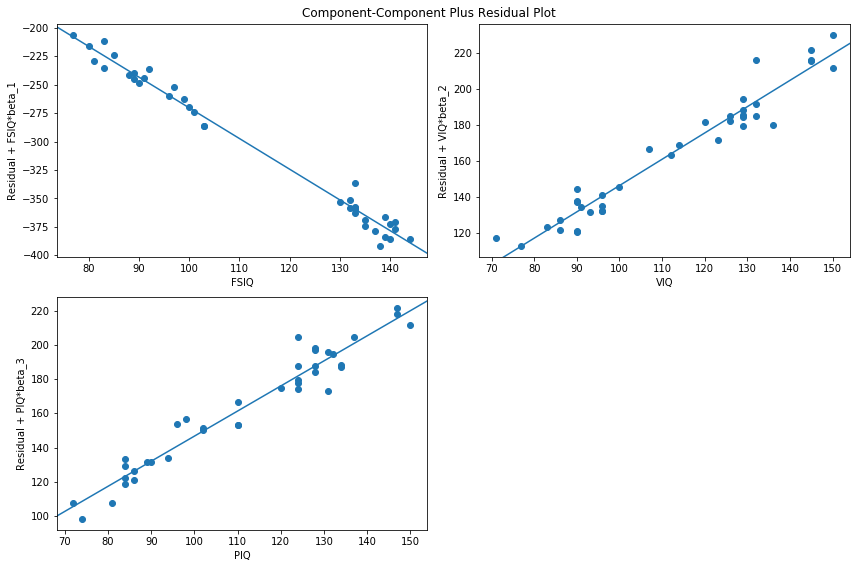

In [12]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_ccpr_grid(model_partY, fig=fig)

### Multiple regression model with variable partY2

In [13]:
# Fit the model
model_partY2 = ols('partY2 ~ FSIQ + VIQ + PIQ', data).fit()

# Print the summary
print(model_partY2.summary())

                            OLS Regression Results                            
Dep. Variable:                 partY2   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                    0.3932
Date:                Sat, 30 May 2020   Prob (F-statistic):              0.759
Time:                        13:34:06   Log-Likelihood:                -145.99
No. Observations:                  38   AIC:                             300.0
Df Residuals:                      34   BIC:                             306.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    112.0505     15.534      7.213      0.0

Here, we can observe totally different p-values for the slopes of FSIQ, VIQ and PIQ, when the combination of the variables FSIQ, VIQ and PIQ are set to predict partY2. The variabe partY2 is therefore not well predicted by the three factors FSIQ, VIQ and PIQ. We will not report the results of this model on partY2 as it does not yield significant results.


#### P-hacking and broader bias in science

P-hacking can take various forms. The latter is the manipulation of data collection, usage, or analyses to obtain statistically significant outcomes. P-hacking as described, reports directly to p-values but the issue can be broader and more indirect and still have great negative impact on result reporting and bias in science. For example, it can be reporting significant results of a model that violates assumptions, or selective reporting of only significance results, not mentioning absence of effect for example. 

1) Indeed, a big mistake that was made here is the absence of assumption checking. As soon as we saw that very significant results were obtain with the model with partY, we let go of assumptions in order to assure statistical significant results. This is definitely a form of manipulation of analysis. In order to conduct multiple regression, these following assumptions must be met: 
* A linear relationship between the dependent variables and the independent variables.
* The independent variables are not too highly correlated with each other.
* Independance of observation (i.e., independence of residuals)
* Residuals should be normally distributed with a mean of 0 and variance σ.
* There should be no significant outliers, high leverage points or highly influential points
* Your data needs to show homoscedasticity of residuals (equal error variances)

Violation of assumptions introduces bias, the validity of assumptions must be confirmed prior to data analysis to ensure that the methods and strategies chosen are appropriate and will yield valid results. In this case, for example, the relationship of partY with the independent variables was not linear in any case. Additionnaly, the output of the ols models gave an indication that: "The condition number is large, 1.6e+03. This might indicate that there arestrong multicollinearity or other numerical problems". 

These violation combined with the absent verification of the other assumption invalidates the results, their statistical significance and their interpretation from both models.

2) Selective reporting is a definite bias and was observed in this case. Here as the model trying to predict partY2 did not result in any statistically significant p-values we chose not to report it and only report the "statistically significant" results of the model with partY. 

Mostly the result of publication bias, it has also led to another form of p-hacking "reverse p-hacking" via several manipulation whereby researchers ensure that tests produce a nonsignificant result.

